# Notebook 2: HOLC and Tree Canopy Mapping

#### Welcome to *notebook 2*! This activity will take approximately [XX] minutes and we hope that by the end of the activity, you will be able to:
- Conceptualize HOLC data and understand its current social implications
- Develop specific methods to help read maps and graphs
- Become familiarized with tree coverage (tree canopy) data in California 
- Compare the similarities/differences between HOLC and Tree Canopy data

**Before we get started, let's import the libraries and packages needed for this activity. Don't worry if you don't understand it, just run the cell once prior to starting! Make sure to run this cell everytime you open the link.**

In [6]:
# Libraries that this notebook will use: 

# pip install libraries!


# Libraries that this notebook will use:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from datascience import *
from matplotlib.colors import ListedColormap
import re

# Helps the maps display nicely in the notebook:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]

# Tells the notebook not to display warnings:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

# Color Scheming
from matplotlib.colors import ListedColormap
holc_cmap = ListedColormap(['green', 'blue', 'yellow', 'red'], name='holc_colors')

# Libraries for Map Overlays
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 17.4MB 19.8MB/s eta 0:00:01    |███████████████████▌            | 10.7MB 3.6MB/s eta 0:00:02
     |████████████████████████████████| 112kB 6.7MB/s eta 0:00:01


## 1. Background: *Richmond, Virginia*
<img src="tree_canopy_virginia.jpeg" width="550"/>

Let's explore the above photo, which details the neighborhoods of Richmond, Virginia and their tree coverage. This photo is adapted from New York Times' recent article titled <a href="https://www.nytimes.com/interactive/2020/08/24/climate/racism-redlining-cities-global-warming.html">*How Decades of Racist Housing Policy Left Neighborhoods Sweltering*</a>, published in August of 2020. Redlined areas are highlighted in the image above and are often denied banking and mortgage services, such as *loans* to purchase homes.

<div class="alert alert-warning">
<b>Warm-Up Question: </b> What patterns do you notice? Why do you think this pattern occurs? How do redlined neighborhoods relate to racist housing policies and the environment? 
Hint: Take a look at the areas surrounding downtown and compare their tree coverage to the outter layer of suburbs.
</div>

***Write your answer here, replacing this text***

To understand these questions further, we need to investigate the source of redlining's history: **HOLC**.

## 2. HOLC

The *Home Owners' Loan Corporation*, otherwise known as **HOLC**, began in the 1930s as a government-financed by-product of Roosevelt's New Deal. Its original goals were to refinance property mortgages to prevent foreclosures while expanding buying opportunities for those looking for new homes. 

HOLC primarily operated by issuing loans to borrowers. In the context of HOLC, loans were distributed to homeowners who struggled to make consistent housing payments. In addition to distributing loans, HOLC also assessed credit-worthiness for different groups of people within a specific city. This so-called credit-worthiness created borders, which targeted minorities (African Americans specifically) and separated neighborhoods on the basis of a perceived financial risk. This process of separation became known as ***redlining*** and can be found throughout several *HOLC maps*, including the one from the NYT article above. Let's conceptualize redlining and HOLC maps to somewhere closer to home, like Oakland.

### 2.1 Understanding HOLC Maps

In HOLC Maps, ratings are given as letter grades to each neighborhood, signifying the neighborhood's investment credibility for lending purposes. Each neighborhood's rating is primarily a function of neighborhood racial and ethnic makeup, housing conditions, and access to public facilities, among other factors. 

Ratings assigned to neighborhoods included: **“A-Best”, “B-Still Desirable”, “C-Definitely Declining”, and “D-Hazardous”.** 

Let's analyze the HOLC map for Oakland.

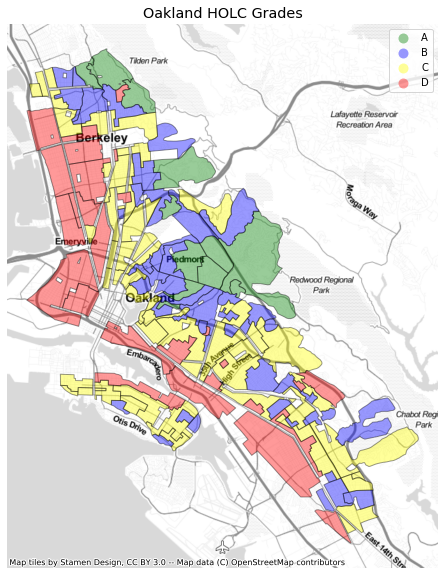

In [7]:
# Create a HOLC Map of Oakland using Geopandas

# Read in data
oakland = gpd.read_file('holc_oakland')
oakland_converted = oakland.to_crs(epsg=3857)

# Oakland HOLC Map
base = oakland_converted.plot(column = 'holc_grade', cmap = holc_cmap, alpha=0.4, legend = True, figsize=[18, 10])
plt.title('Oakland HOLC Grades', size='x-large')
plt.axis('off');

ctx.add_basemap(base, url=ctx.providers.Stamen.TonerLite)

<div class="alert alert-warning">
<b>Question 2.1.1: </b> Locate Berkeley on the map above. What do you notice about UC Berkeley? What grades do areas in the city of Berkeley have (Northside, Southside, Downtown), and why do you think this is the case?
</div>

***Write your answer here, replacing this text.***

<div class="alert alert-warning">
<b>Question 2.1.2: </b> What part of Oakland is given an 'A' grade? What factors may separate these areas from the rest? 
</div>

***Write your answer here, replacing this text.***

## 3. Connections Between HOLC and Tree Canopy Data

### 3.1 Tree Canopy Data

Tree canopy refers to areas that are shaded by trees. To represent this information with data, people abstract colors in an image into squares. You can see this abstraction in the images below. The image on the left is what the ground looks like from above, which can be found on satellite services such as Google Earth. The middle image is a high data version that contains squares to represent very small areas of the image. The right image is the low data version, which means each square represents a larger piece of land from the original photo.

To contextualize this, consider the tent/building in the middle of the photo on the left hand side. Since this building itself is not green but its surroundings are green, notice how when the photo is abstracted into squares, the corresponding piece of land remains white. These *squares* and their shades of green are what ultimately determine a square's tree coverage percentage, an idea explained in detail later on.



### SHOULD WE INCLUDE AN EXPLANATION FOR THE DIMENSIONS IN OUR DATA? 30M X 30M?

#### we could, although this may make it lengthy and if we link them to external resources maybe they can read up on it 

<img src="tree_raster.jpg" width="550"/>

Learn more [here](https://spatialvision.com.au/blog-raster-and-vector-data-in-gis/)

### maybe from here, pull a diagram that we have already created to put this into deeper perspective. or, replace the above progression with one we make ourselves.

### key topics to bring to attention for students: what a polygon entails, what tree coverage % is (loosely, what does it look like visually?), how average % and other calculations from the data are calculated 

### key topics already established: abstraction of satellite images into squares, what squares are, 

In our case, we want to understand tree canopy in relation to HOLC neighborhoods. To do this, we needed to create measures to represent the coverage within a neighborhood.

<img src="raster_polygon.png" width="550"/>

[Conversion reference](https://pro.arcgis.com/en/pro-app/tool-reference/conversion/raster-to-polygon.htm)

The data we are using is from the [National Land Cover Database](https://www.mrlc.gov/data/nlcd-2016-usfs-tree-canopy-cover-conus). It contains the mean tree canopy rate in 2016 for 7 areas in California (San Francisco, Oakland, San Jose, Fresno, Stockton, Los Angeles, and San Diego). Each city is broken into different neighborhoods based on HOLC areas. 

Note that below, each HOLC graded area corresponds to a polygon (whose shape is described in the `geometry` column). For this reason, polygons and HOLC graded areas can be used interchangeably. Additionally, when the phrase *tree coverage percentage*, this is a given square's tree coverage expressed as a percent (bounded by 0% [no tree coverage] and 100% [complete tree coverage]). 

*Here is more information on what our dataset contains:*

|Column Name| Meaning|
|---|---|
|holc_grade| HOLC letter grade for a certain neighborhood in a California area|
|area| California City corresponding to a given HOLC graded area |
|count_squares| Total number of squares that are at least 50% covered by a HOLC graded area's borders |
|sum_treeCov| Sum of tree-coverage percentage across all squares in a HOLC graded area|
|avg_treeCov| _sum/_count; Average tree-coverage percentage across a HOLC graded area |
|geometry| Shape of the neighborhood that we use to create our map; encloses a HOLC graded area|

In [24]:
# Above, I changed 
# _count -> count_squares
# _sum -> sum_treeCov
# _mean -> avg_treeCov

# These changes are reflected below, but we can decide on what to name it moving forward

In [23]:
# Import data
holc_5072 = gpd.read_file('holc_ca_epsg5072_treecov')
holc_5072 = holc_5072.drop(columns=['name', 'holc_id', 'area_descr'])
holc_5072 = holc_5072.rename(columns = {"_count" : "count_squares", "_sum" : "sum_treeCov", 
                             "_mean" : "avg_treeCov"})
holc_5072 = holc_5072[["holc_grade", "area", "count_squares", "sum_treeCov", "avg_treeCov", 
                       "geometry"]]
holc_5072.head()

,holc_grade,area,count_squares,sum_treeCov,avg_treeCov,geometry
0,A,Oakland,7737.0,176517.0,22.814657,"POLYGON ((-2256129.514 1954655.076, -2256108.7..."
1,A,Berkeley,2130.0,17375.0,8.157277,"POLYGON ((-2258485.837 1965737.749, -2258407.4..."
2,A,Oakland,194.0,622.0,3.206186,"POLYGON ((-2258903.873 1954942.364, -2258949.8..."
3,A,Oakland,345.0,3700.0,10.724638,"POLYGON ((-2256129.514 1954655.076, -2256191.2..."
4,A,Berkeley,746.0,7629.0,10.226542,"POLYGON ((-2259866.714 1965745.875, -2259877.5..."


<div class="alert alert-warning">
<b>Question 3.0.1: </b> Looking at the first row in the table. What does a tree canopy _count of 7737 indicate for Oakland? What does a tree canopy _mean of 22.814 indicate? Are these significant given that this area is in an A-HOLC grade area?
</div>

***Write your answer here, replacing this text***

Now that we have a better understanding of HOLC areas and their histories, let's apply this knowledge to a dataset about tree canopy coverage to investigate disparities in these environments. Let's compare these mean tree canopy scores across different HOLC grades. What possible relationship might there be?

### 3.1 HOLC & Tree Canopy Coverage

Below, we created groups where each represented a different HOLC grade. For each group, we introduce some new variables, which are described below.

*Here is more information on what our grouped data contains:*

|Column Name| Meaning|
|---|---|
|count_squares| Total number of squares that are at least 50% covered by a HOLC graded area's borders |
|grouped_avg_treeCov| Average tree-coverage percentage across all areas with given HOLC grade|
|HOLC_area_pct| Total percentage of area across 7 cities associated with given HOLC grade |
|color | The color of the HOLC graded area |

In [26]:
summed = holc_5072.groupby('holc_grade').sum()
summed['grouped_avg_treeCov'] = summed['avg_treeCov'] / summed['count_squares']
summed['HOLC_area_pct'] = summed['count_squares'] / sum(summed['count_squares'])
summed['color'] = ['green', 'blue', 'yellow', 'red']
summed[["count_squares", "grouped_avg_treeCov", "HOLC_area_pct", "color"]]

,count_squares,grouped_avg_treeCov,HOLC_area_pct,color
holc_grade,,,,
A,158447.0,0.006293,0.116667,green
B,278064.0,0.004416,0.204742,blue
C,575920.0,0.001370,0.424057,yellow
D,345687.0,0.000744,0.254534,red


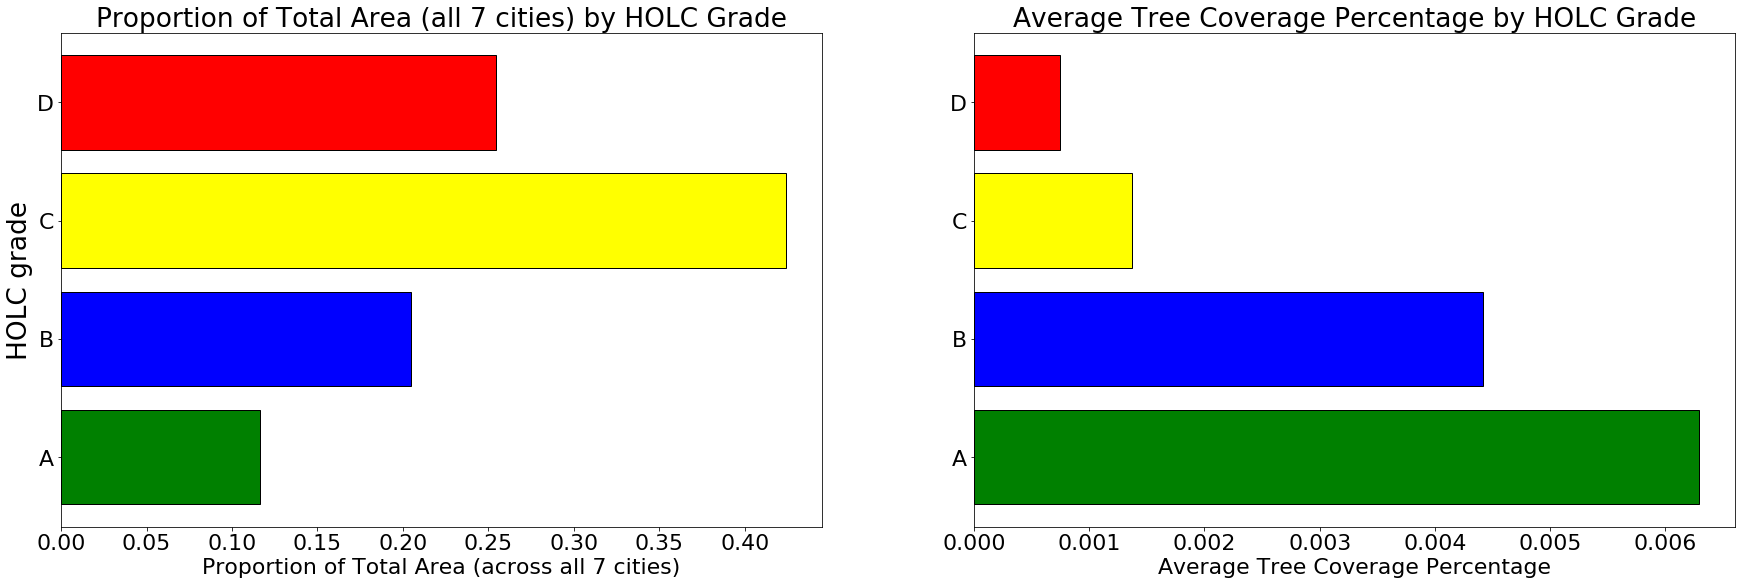

In [31]:
plt.rcParams.update({'font.size': 22})

fig = plt.figure()

ax1=plt.subplot(2, 2, 1)
ax1.set_xlabel("Proportion of Total Area (across all 7 cities)")
plt.barh(summed.index, summed["HOLC_area_pct"], color = summed['color'])

ax2=plt.subplot(2, 2, 2)
ax2.set_xlabel("Average Tree Coverage Percentage")
plt.barh(summed.index, summed['grouped_avg_treeCov'], color=summed['color']);

ax1.set_ylabel('HOLC grade', fontsize='large');

ax1.set_title("Proportion of Total Area (all 7 cities) by HOLC Grade");
ax2.set_title("Average Tree Coverage Percentage by HOLC Grade");

Consider the following to answer the question below:
- Which HOLC grade has the highest average tree coverage percentage? Which has the lowest?
- Which HOLC grades cover the largest proportion of area?

<div class="alert alert-warning">
<b>Question 3.1.1: </b> What are possible implications for neighborhoods in different HOLC areas in regards to average tree canopy coverage percentage?
</div>

***Write your answer here, replacing this text***

We have seen how tree coverage varies across different HOLC grades, but how does this relationship hold for individual cities?

Let's map HOLC areas and tree coverage for different cities in California. 

## 4. Visualizing Tree Canopy and HOLC Data across California

To visualize this, let's play around with a widget, which contains the side-by-side comparisons of Tree Canopy and HOLC Data for Los Angeles, Fresno, San Francisco, San Jose, Stockton, San Diego, and Oakland. Simply select a city in the drop down menu and the widget will update.

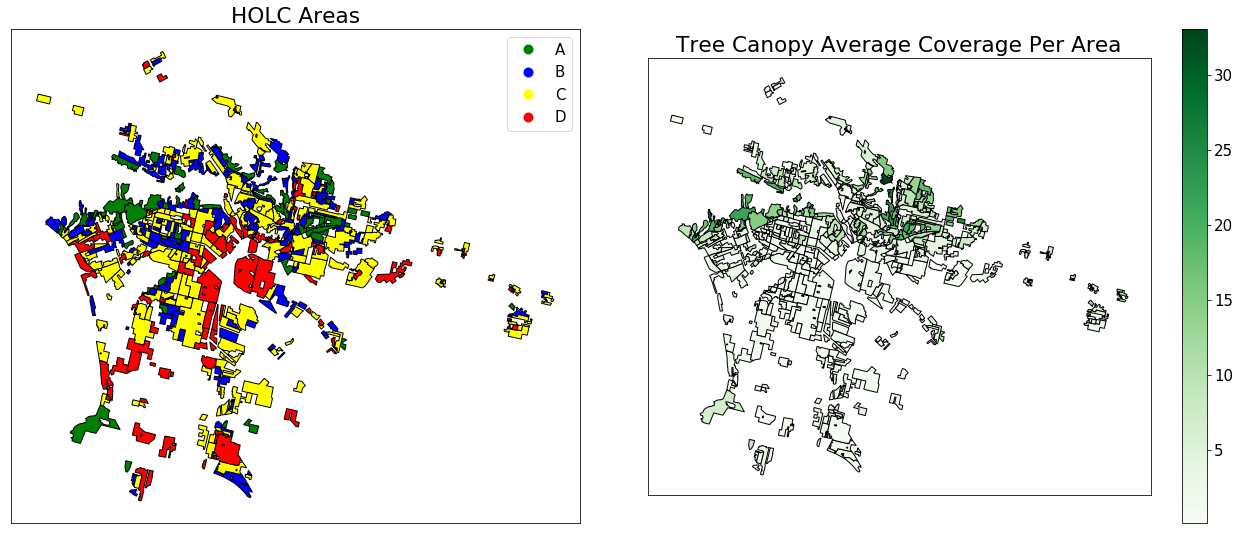

In [54]:
import ipywidgets as widgets
plt.rcParams.update({'font.size': 15});

%run -i widget_script_AC.py
widgets.VBox([widgets.VBox([inp]), out])

<div class="alert alert-warning">
<b>Question 4.1.1: </b> Based on the city you selected, what patterns do you notice from your plot above?
</div>

***Write your answer here, replacing this text***

<div class="alert alert-warning">
<b>Question 4.1.2: </b> Select San Francisco from the drop-down menu. Are there any areas where the association between HOLC grade and Tree Canopy coverage is contradictory? Why do you think this is?
</div>

***Write your answer here, replacing this text***

## 5. Reflection

Today, you had an opportunity to investigate `HOLC Grades` and `Tree Canopy Data` in California. From the graphs constructed above, you learned how such datasets overlap with one other and connect with larger social implications such as redlining and racial inequality among neighborhoods. 

<div class="alert alert-warning">
<b>Wrap-Up: </b> Given what was covered in this notebook, do you believe that the relationship between HOLC grades and Tree Canopy data holds for other states? To what extent could social and racial inequalities be explained through the environment? 
</div>

***Write your answer here, replacing this text***

<div class="alert alert-info">
<b>Feedback: </b> What was one aspect of the notebook that you found enjoyable? What aspect would you change?
</div>

***Write your answer here, replacing this text***

**Acknowledgements:**
- Article referenced: <a href="https://www.nytimes.com/interactive/2020/08/24/climate/racism-redlining-cities-global-warming.html">*How Decades of Racist Housing Policy Left Neighborhoods Sweltering*</a>
- Data from the [National Land Cover Database](https://www.mrlc.gov/data/nlcd-2016-usfs-tree-canopy-cover-conus)
- Notebook Developed by Alexander Cui & Ashley Quiterio